In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc

In [2]:

data_train_tag = pd.read_csv('./训练数据集1/训练数据集_tag.csv')
data_train_trd = pd.read_csv('./训练数据集1/训练数据集_trd.csv')
data_train_beh = pd.read_csv('./训练数据集1/训练数据集_beh.csv')

test_tag = pd.read_csv('./b/评分数据集_tag_b.csv')
test_trd = pd.read_csv('./b/评分数据集_trd_b.csv')
test_beh = pd.read_csv('./b/评分数据集_beh_b.csv')


In [8]:
train_data = pd.read_csv('./b/train_data_.csv')

flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cur_debit_cnt, dtype: object

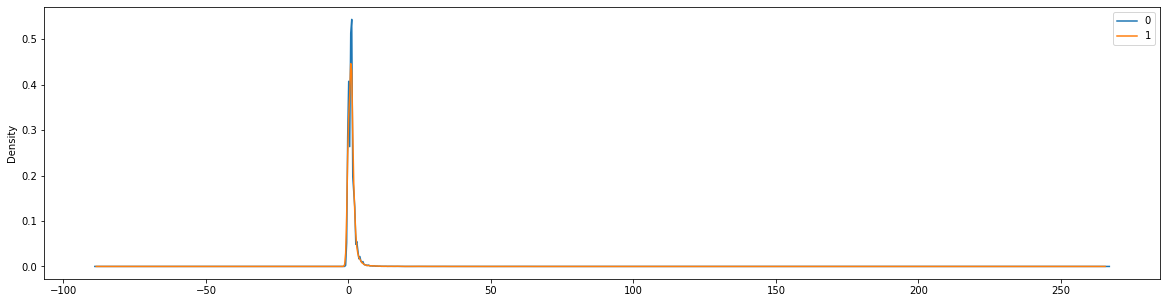

In [7]:
data_train_tag.groupby('flag')[''].plot(kind='kde', legend=True, figsize=(20,5))

flag
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

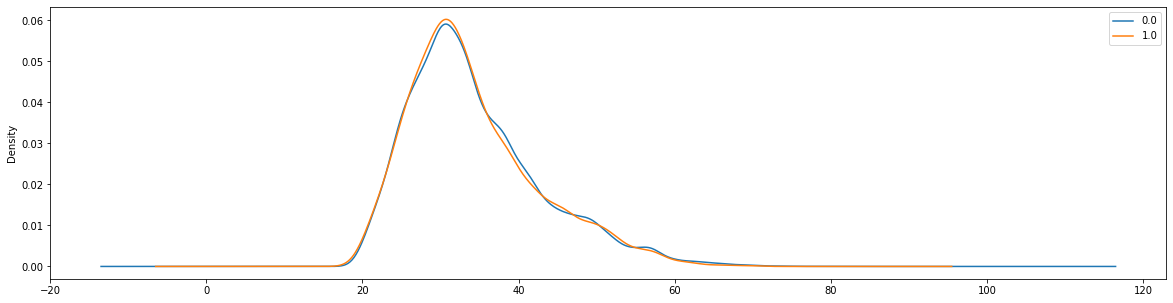

In [34]:
train_data.groupby('flag')['age'].plot(kind='kde', legend=True, figsize=(20,5))

In [11]:
train_data['gdr_cd'].value_counts()

1.0    23751
0.0    16172
Name: gdr_cd, dtype: int64

In [12]:
data_train_tag['gdr_cd'].value_counts()

M     23015
F     16172
\N      736
Name: gdr_cd, dtype: int64

In [15]:
data_train_trd.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


In [16]:
data_train_trd.groupby(['id']).agg({'cny_trx_amt': 'max'})

,cny_trx_amt
id,
U000101,3640.00
U00015C,12000.00
U0001B8,3400.00
U00025B,18986.99
U000437,50000.00
...,...
UFFF6BB,11250.00
UFFF7F4,49999.00
UFFF9D8,-998.00


In [17]:
data_train_trd.cny_trx_amt.describe()

count    1.367211e+06
mean     4.892947e+00
std      6.997166e+04
min     -2.390000e+07
25%     -2.000000e+02
50%     -2.400000e+01
75%     -2.000000e+00
max      3.389516e+07
Name: cny_trx_amt, dtype: float64

In [18]:
train_data.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,trd_times,total_count,B_out,C_in,out_count,in_count,pg_times
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,3492,-1,10,3.0,2400.00,1.0,2.0,15000.00,17400.00,1.0
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,4575,-1,10,1.0,0.00,0.0,2.0,0.00,0.00,1.0
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,4894,-1,40,17.0,-25439.96,6.0,11.0,131158.00,105718.04,35.0
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,4938,-1,10,1.0,0.00,0.0,2.0,0.00,0.00,1.0
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,2378,-1,20,18.0,9089.51,5.0,13.0,70416.04,79505.55,22.0


In [19]:
train_data.out_count = -1*train_data.out_count

In [20]:
train_data.out_count

0        -15000.00
1            -0.00
2       -131158.00
3            -0.00
4        -70416.04
           ...    
39918      -822.81
39919       -10.00
39920        -0.00
39921        -0.00
39922    -19631.70
Name: out_count, Length: 39923, dtype: float64

In [26]:
data_train_beh.groupby('id').agg({'page_no': 'min'})

,page_no
id,
U0001B8,AAO
U000437,AAO
U0015B2,AAO
U0016FF,AAO
U001945,AAO
...,...
UFFF2E7,AAO
UFFF441,AAO
UFFF7F4,AAO


In [24]:
data_train_beh.id.value_counts().to_frame().reset_index()

,index,id
0,U0015B2,3617
1,U8AE05B,3006
2,U8B3216,2255
3,U3C95E8,2125
4,UA4826C,1754
...,...,...
11908,U5DE904,1
11909,U5A0206,1
11910,UB996C0,1
11911,UF44692,1


In [27]:
data_train_trd.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


In [29]:
data_train_trd.groupby('id').agg({'Dat_Flg1_Cd': 'min'})

,Dat_Flg1_Cd
id,
U000101,B
U00015C,B
U0001B8,B
U00025B,B
U000437,B
...,...
UFFF6BB,B
UFFF7F4,B
UFFF9D8,B


## 对tag表特征组合或者统计特征挖掘

In [31]:
train_tag = pd.read_csv('./训练数据集1/train_tag_Ori.csv')

In [32]:
data_train_tag.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,C,9,0,...,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [35]:
train_tag.columns

Index(['id', 'flag', 'gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd',
       'acdm_deg_cd', 'deg_cd', 'job_year', 'ic_ind', 'fr_or_sh_ind',
       'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind',
       'hav_hou_grp_ind', 'l6mon_agn_ind', 'frs_agn_dt_cnt',
       'vld_rsk_ases_ind', 'fin_rsk_ases_grd_cd',
       'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd',
       'l6mon_daim_aum_cd', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd',
       'bk1_cur_year_mon_avg_agn_amt_cd', 'l12mon_buy_fin_mng_whl_tms',
       'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
       'l12_mon_gld_buy_whl_tms', 'loan_act_ind', 'pl_crd_lmt_cd',
       'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'hld_crd_card_grd_cd',
       'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'atdd_type',
       'perm_crd_lmt_cd', 'cur_debit_cnt', 'cur_credit_cnt',
       'cur_debit_min_opn_dt_cnt', 'cur_credit_min_opn_dt_cnt',
       'cur_debit_crd_lvl'],
      dtype='object')

In [36]:
train_tag.age.describe()

count    39923.000000
mean        34.325727
std          8.541069
min         19.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         84.000000
Name: age, dtype: float64

In [38]:
# 对年龄进行分层
train_tag['is_less_21'] = 0
train_tag.loc[data_train_tag.age.isin(range(0,21)), 'is_less_21'] = 1

train_tag['is_in_21_29'] = 0
train_tag.loc[data_train_tag.age.isin(range(21,29)), 'is_in_21_29'] = 1

train_tag['is_in_29_34'] = 0
train_tag.loc[data_train_tag.age.isin(range(29,34)), 'is_in_29_34'] = 1

train_tag['is_in_34_40'] = 0
train_tag.loc[data_train_tag.age.isin(range(34,40)), 'is_in_34_40'] = 1

train_tag['is_in_40_55'] = 0
train_tag.loc[data_train_tag.age.isin(range(40,55)), 'is_in_40_55'] = 1

train_tag['is_in_55_100'] = 0
train_tag.loc[data_train_tag.age.isin(range(55,100)), 'is_in_55_100'] = 1

In [39]:
train_tag.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,is_less_21,is_in_21_29,is_in_29_34,is_in_34_40,is_in_40_55,is_in_55_100
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,0,3492,-1,10,0,0,0,0,1,0
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,0,4575,-1,10,0,0,0,1,0,0
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,0,4894,-1,40,0,0,0,0,1,0
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,0,4938,-1,10,0,0,0,0,1,0
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,0,2378,-1,20,0,0,0,0,1,0


In [37]:
test_tag.age.describe()

count    4000.000000
mean       34.029500
std         8.404778
min        19.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64

In [40]:
test_tag_ = pd.read_csv('./b/test_tag_Ori.csv')

In [41]:
# 对测试集年龄进行分层
test_tag_['is_less_21'] = 0
test_tag_.loc[test_tag.age.isin(range(0,21)), 'is_less_21'] = 1

test_tag_['is_in_21_29'] = 0
test_tag_.loc[test_tag.age.isin(range(21,29)), 'is_in_21_29'] = 1

test_tag_['is_in_29_34'] = 0
test_tag_.loc[test_tag.age.isin(range(29,34)), 'is_in_29_34'] = 1

test_tag_['is_in_34_40'] = 0
test_tag_.loc[test_tag.age.isin(range(34,40)), 'is_in_34_40'] = 1

test_tag_['is_in_40_55'] = 0
test_tag_.loc[test_tag.age.isin(range(40,55)), 'is_in_40_55'] = 1

test_tag_['is_in_55_100'] = 0
test_tag_.loc[test_tag.age.isin(range(55,100)), 'is_in_55_100'] = 1

In [83]:
data_train_tag.loc[:, 'acdm_deg_cd'].fillna(data_train_tag.loc[:, 'acdm_deg_cd'].mode()[0], inplace=True)

In [84]:
data_train_tag.loc[:, 'acdm_deg_cd'].isnull().sum()

0

In [85]:
from sklearn.preprocessing import OrdinalEncoder
x = np.array(data_train_tag.loc[:, 'acdm_deg_cd']).reshape(-1,1)
oe = OrdinalEncoder().fit(x)
data_train_tag.loc[:, 'acdm_deg_cd'] = oe.transform(x)

In [86]:
oe.categories_

[array(['30', '31', 'C', 'D', 'F', 'G', 'Z', '\\N'], dtype=object)]

In [89]:
data_train_tag.groupby('flag')['l1y_crd_card_csm_amt_dlm_cd'].plot(kind='kde', legend=True, figsize=(20,5))

TypeError: no numeric data to plot

flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: bk1_cur_year_mon_avg_agn_amt_cd, dtype: object

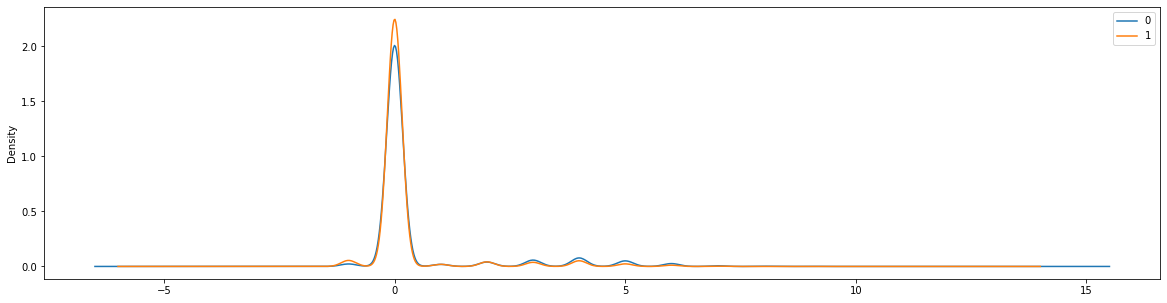

In [59]:
data_train_tag.groupby('flag')['cur_deb'].plot(kind='kde', legend=True, figsize=(20,5))

In [ ]:
train_tag.groupby('flag')['cur_credit_min_opn_dt_cnt'].plot(kind='kde', legend=True, figsize=(20,5))

flag
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: cur_credit_min_opn_dt_cnt, dtype: object

In [ ]:
data_train_tag.cur_credit_min_opn_dt_cnt

In [73]:
data_train_tag.l12_mon_gld_buy_whl_tms.value_counts()

0      39369
\N       500
1         32
7          4
2          3
12         3
29         2
241        2
11         1
4          1
127        1
3          1
132        1
20         1
10         1
333        1
Name: l12_mon_gld_buy_whl_tms, dtype: int64

In [58]:
data_train_tag.l1y_crd_card_csm_amt_dlm_cd.describe()

count    39923.000000
mean         0.875235
std          1.354406
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: l6mon_daim_aum_cd, dtype: float64